In [1]:
import matplotlib
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import gapminder

In [2]:
hdu = fits.open('galSpecLine-dr8.fits')
hdu1 = fits.open('galSpecInfo-dr8.fits')

In [3]:
# define emission lines & redshift
z = hdu1[1].data['Z'].tolist()
z_warn = hdu1[1].data['Z_WARNING'].tolist()
ha = hdu[1].data['H_ALPHA_FLUX'].tolist()
ha_err = hdu[1].data['H_ALPHA_FLUX_ERR'].tolist()
hb = hdu[1].data['H_BETA_FLUX'].tolist()
hb_err = hdu[1].data['H_BETA_FLUX_ERR'].tolist()
n2 = hdu[1].data['NII_6584_FLUX'].tolist()
n2_err = hdu[1].data['NII_6584_FLUX_ERR'].tolist()
o3 = hdu[1].data['OIII_5007_FLUX'].tolist()
o3_err = hdu[1].data['OIII_5007_FLUX_ERR'].tolist()

In [4]:
data_names = ['ha', 'ha_err', 'hb', 'hb_err', 'n2', 'n2_err', 'o3', 'o3_err', 'z', 'z_warn']
data_dict = {'ha' : ha, 'ha_err' : ha_err, 'hb' : hb, 'hb_err' : hb_err, 'n2' : n2, 'n2_err' : n2_err, 'o3' : o3, 'o3_err' : o3_err, 'z' : z, 'z_warn' : z_warn}
df = pd.DataFrame(data_dict)

In [5]:
# removing 0 values from all varaibles
for name in data_names: 
    df = df.loc[df[name].notnull()]

In [6]:
# Making the SNR cuts
df = df.loc[(df['ha']/df['ha_err']) > 5]
df = df.loc[(df['hb']/df['hb_err']) > 5]
df = df.loc[(df['n2']/df['n2_err']) > 5]
df = df.loc[(df['o3']/df['o3_err']) > 5]

In [7]:
def bpt_kaufmann():
    x=np.linspace(-2,0,500)
    logdivline=(0.61/(x-0.05))+1.3
    return x, logdivline

#log([nii]/ha) is on the x-axis
#log([oiii]/hb) is on the y-axis
def bpt_kewley():
    x=np.linspace(-2,0.46,500)
    logdivlinek=(0.61/(x-0.47))+1.19
    return x, logdivlinek

#log([nii]/ha) is on the x-axis
#log([oiii]/hb) is on the y-axis
def bpt_liner():
    x=np.linspace(-0.133638005,0.75,100)
    y=2.1445*x+0.465
    return x,y

def plot_bpt(nii,halpha,oiii,hbeta,fig=None,**kwargs):
    halpha=np.array(halpha,dtype=float)
    nii=np.array(nii,dtype=float)
    hbeta=np.array(hbeta,dtype=float)
    oiii=np.array(oiii,dtype=float)
    n2ha=np.log10(nii/halpha)
    o3hb=np.log10(oiii/hbeta)
    kaufmann=bpt_kaufmann()
    kewley=bpt_kewley()
    liner=bpt_liner()
    plt.scatter(n2ha,o3hb,c='g',**kwargs)
    plt.plot(kaufmann[0],kaufmann[1],c='b')
    plt.plot(kewley[0],kewley[1],c='r',linestyle='--')
    plt.plot(liner[0],liner[1],c='w',linestyle='-.')
    plt.xlim(-2,1)
    plt.ylim(-1.5,1.5)
    plt.xlabel(r'$log_{10}($[NII]/h$\alpha)$')
    plt.ylabel(r'$log_{10}($[OIII]/h$\beta)$')
    plt.show()
    return

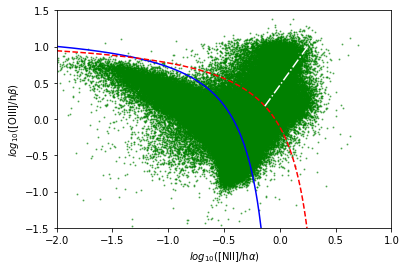

In [8]:
nii = df['n2'].values
halpha = df['ha'].values
oiii = df['o3'].values
hbeta = df['hb'].values

plot_bpt(nii, halpha, oiii, hbeta, s = 1, alpha = .5)

In [9]:
# Making the SNR cuts
df1 = df.loc[(df['ha']/df['ha_err']) > 5]
df1 = df.loc[(df['hb']/df['hb_err']) > 5]
df1 = df.loc[(df['n2']/df['n2_err']) > 5]
df1 = df.loc[(df['o3']/df['o3_err']) > 5]
df1 = df.query('z > 0.2 & z < 0.4')

In [10]:
def bpt_kaufmann():
    x=np.linspace(-2,0,500)
    logdivline=(0.61/(x-0.05))+1.3
    return x, logdivline

#log([nii]/ha) is on the x-axis
#log([oiii]/hb) is on the y-axis
def bpt_kewley():
    x=np.linspace(-2,0.46,500)
    logdivlinek=(0.61/(x-0.47))+1.19
    return x, logdivlinek

#log([nii]/ha) is on the x-axis
#log([oiii]/hb) is on the y-axis
def bpt_liner():
    x=np.linspace(-0.133638005,0.75,100)
    y=2.1445*x+0.465
    return x,y

def plot_bpt1(nii,halpha,oiii,hbeta,fig=None,**kwargs):
    halpha1=np.array(halpha,dtype=float)
    nii1=np.array(nii,dtype=float)
    hbeta1=np.array(hbeta,dtype=float)
    oiii1=np.array(oiii,dtype=float)
    n2ha1=np.log10(nii/halpha)
    o3hb1=np.log10(oiii/hbeta)
    kaufmann=bpt_kaufmann()
    kewley=bpt_kewley()
    liner=bpt_liner()
    plt.scatter(n2ha1,o3hb1,c='g', **kwargs)
    plt.plot(kaufmann[0],kaufmann[1],c='b')
    plt.plot(kewley[0],kewley[1],c='r',linestyle='--')
    plt.plot(liner[0],liner[1],c='w',linestyle='-.')
    plt.xlim(-2,1)
    plt.ylim(-1.5,1.5)
    plt.xlabel(r'$log_{10}($[NII]/h$\alpha)$')
    plt.ylabel(r'$log_{10}($[OIII]/h$\beta)$')
    plt.show()
    return

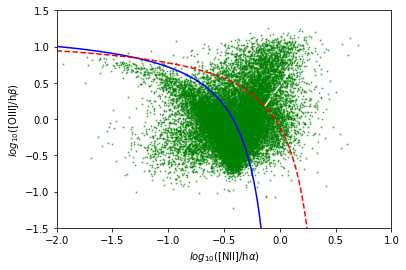

In [11]:
nii1 = df1['n2'].values
halpha1 = df1['ha'].values
oiii1 = df1['o3'].values
hbeta1 = df1['hb'].values

plot_bpt1(nii1, halpha1, oiii1, hbeta1, s = 1, alpha = .5)

In [12]:
def plot_bpt2(nii, halpha, oiii, hbeta, nii1, halpha1, oiii1, hbeta1, fig=None,**kwargs):
    halpha=np.array(halpha,dtype=float)
    nii=np.array(nii,dtype=float)
    hbeta=np.array(hbeta,dtype=float)
    oiii=np.array(oiii,dtype=float)
    n2ha=np.log10(nii/halpha)
    o3hb=np.log10(oiii/hbeta)
    halpha1=np.array(halpha1,dtype=float)
    nii1=np.array(nii1,dtype=float)
    hbeta1=np.array(hbeta1,dtype=float)
    oiii1=np.array(oiii1,dtype=float)
    n2ha1=np.log10(nii1/halpha1)
    o3hb1=np.log10(oiii1/hbeta1)
    kaufmann=bpt_kaufmann()
    kewley=bpt_kewley()
    liner=bpt_liner()
    plt.scatter(n2ha1, o3hb1, c='k',**kwargs)
    plt.scatter(n2ha, o3hb, c='g', **kwargs)
    plt.plot(kaufmann[0],kaufmann[1],c='b')
    plt.plot(kewley[0],kewley[1],c='r',linestyle='--')
    plt.plot(liner[0],liner[1],c='w',linestyle='-.')
    plt.xlim(-2,1)
    plt.ylim(-1.5,1.5)
    plt.xlabel(r'$log_{10}($[NII]/h$\alpha)$')
    plt.ylabel(r'$log_{10}($[OIII]/h$\beta)$')
    plt.show()
    return

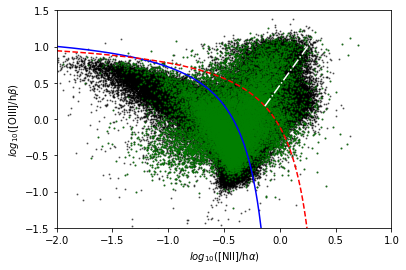

In [13]:
nii1 = df1['n2'].values
halpha1 = df1['ha'].values
oiii1 = df1['o3'].values
hbeta1 = df1['hb'].values
nii = df['n2'].values
halpha = df['ha'].values
oiii = df['o3'].values
hbeta = df['hb'].values

plot_bpt2(nii1, halpha1, oiii1, hbeta1, nii, halpha, oiii, hbeta, s = 1, alpha = .5)

In [14]:
df

,ha,ha_err,hb,hb_err,n2,n2_err,o3,o3_err,z,z_warn
0,462.117584,10.688581,98.786781,6.727546,205.904617,8.761121,72.290092,6.938117,0.021275,0
11,211.501816,3.971897,53.182281,2.973360,76.354820,3.122694,15.599011,2.936405,0.065024,0
14,233.114075,4.396485,62.109169,3.448451,71.034309,3.260629,35.722919,3.467694,0.064777,0
15,116.869858,2.722310,36.789783,2.279852,25.235680,1.819799,32.565292,2.376735,0.052659,0
16,99.232780,3.807957,26.198608,3.081716,49.053505,3.443593,17.289303,3.289499,0.064589,0
...,...,...,...,...,...,...,...,...,...,...
1700890,16.582920,0.686875,4.910505,0.558793,4.707023,0.469996,3.225282,0.553959,-0.000146,0
1700934,1477.539673,6.558659,354.079041,2.853473,297.134583,4.435361,389.060669,2.409319,0.297440,0
1701023,10.322657,0.859955,3.381730,0.532880,3.864149,0.595372,2.774943,0.498765,-0.000168,0
1701060,18.521366,0.886694,5.587317,0.761722,9.090953,0.645201,6.040051,0.814949,-0.000341,0
